In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

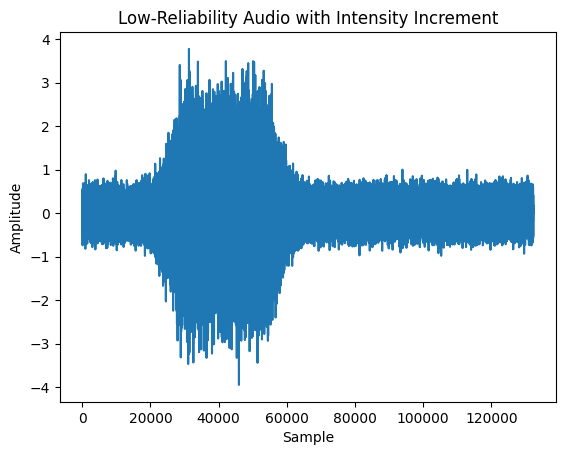

In [2]:
from audio_cue_generator import AudioCueGenerator
audio_cue =AudioCueGenerator()
#test_noise_stimulus = audio_cue.generate_intensity_increment_noise(duration=2,increment_start=1, increment_duration=0.3, noise_type="white")


## High reliablility audio

Text(0, 0.5, 'Amplitude')

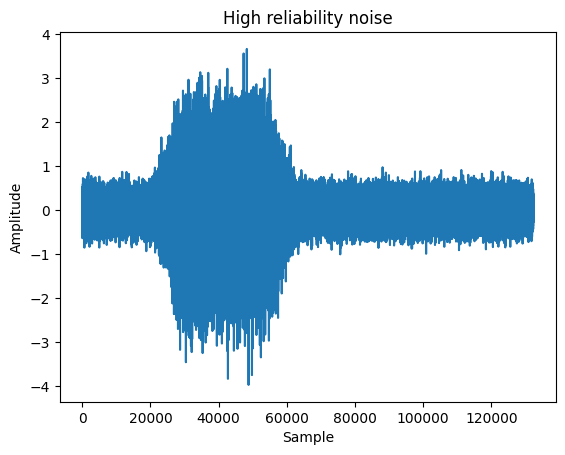

In [8]:

test_sound = audio_cue.low_reliability_test_sound(
    total_dur=3, sample_rate=44100, signal_start=0.7, signal_duration=0.5, noise_type="white", sigma=0.1, peak_amplitude=3)
#audio_cue.play_sound(test_sound)
audio_cue.play_sound(test_sound)
plt.figure()
plt.plot(test_sound)
plt.title("High reliability noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

In [4]:
envelope = np.ones(len(test_sound))
sample_rate=44100 # samples per second
signal_duration = 0.5 # seconds



NameError: name 'test_sound' is not defined

In [ ]:
test_sound

array([ 1.00049464e-014, -6.34244681e-015, -1.56695129e-014, ...,
        1.49338602e-106, -3.78416160e-107,  4.36984413e-106])

Text(0.5, 1.0, 'Gaussian CDF')

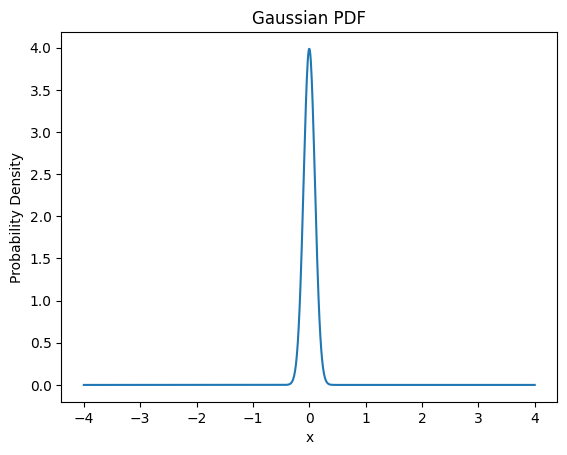

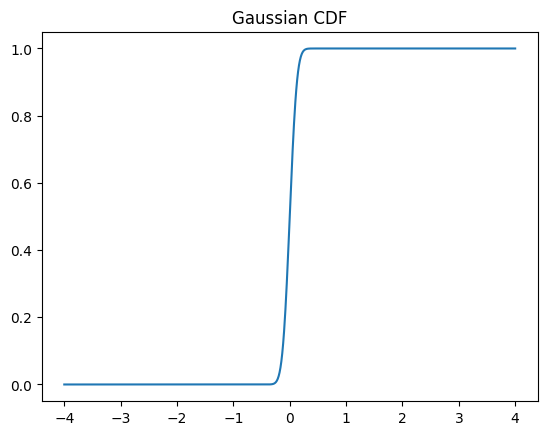

In [5]:
from scipy.special import erf

x = np.linspace(-4, 4, 1000)

def gaussian_pdf(x, mu, sigma):
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return gaussian

def gaussian_cdf(x, mu, sigma):
    cdf = 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))
    return cdf

sigma = 0.1
mu = 0
gaussian = gaussian_pdf(x, mu, sigma)
plt.figure()
plt.plot(x, gaussian)
plt.title("Gaussian PDF")
plt.xlabel("x")
plt.ylabel("Probability Density")

gaussian = gaussian_cdf(x, mu, sigma)
plt.figure()
plt.plot(x, gaussian)
plt.title("Gaussian CDF")




Text(0, 0.5, 'Amplitude')

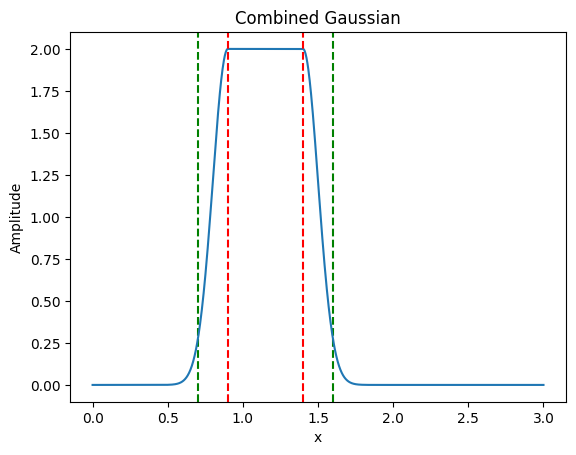

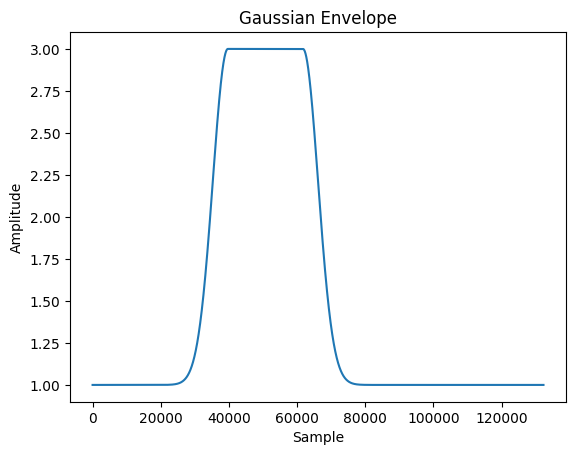

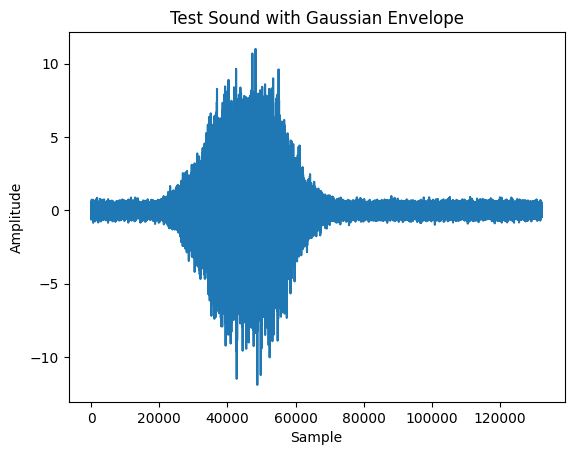

In [23]:
def gaussian_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def sum_of_gaussians(x, mu_list, sigma, intensity=1.0):
    gaussians = [gaussian_pdf(x, mu, sigma) for mu in mu_list]
    combined_gaussian = np.zeros_like(x)
    
    for i in range(len(mu_list) - 1):
        mask1 = (x >= mu_list[i]) & (x <= mu_list[i + 1])
        mask2 = x > mu_list[i + 1]
        gaussians[i][mask1] = np.max(gaussians[i]) #+ np.random.normal(0, 0.05, len(gaussians[i][mask1]))
        gaussians[i][mask2] = 0
        gaussians[i + 1][~mask2] = 0
        combined_gaussian += gaussians[i] + gaussians[i + 1]
        # normalize the combined gaussian
        combined_gaussian /= np.max(combined_gaussian)
    
    return combined_gaussian * intensity

def generate_gaussian_envelope(sound_dur, sample_rate, mu_list, sigma, intensity=1.0, smoothness=1.0):
    envelope = np.zeros(int(sound_dur * sample_rate))
    x = np.linspace(0, sound_dur, len(envelope))
    envelope = sum_of_gaussians(x, mu_list, sigma, intensity) # Generate the Gaussian envelope
    envelope = np.convolve(envelope, np.ones(int(smoothness)) / smoothness, mode='same')
    envelope += 1
    return envelope

# plot combined gaussian
x = np.linspace(0, 3, 1000)
mu_list = [0.9, 1.4]
sigma = 0.1
intensity = 2
combined_gaussian = sum_of_gaussians(x, mu_list, sigma, intensity)
plt.figure()

# calcuate tresholds of increasing and decreasing where the gaussian starts and ends
tresholds = [mu_list[0] - 2 * sigma, mu_list[1] + 2 * sigma]
l = [plt.axvline(t, color='g', linestyle='--') for t in tresholds]

plt.plot(x, combined_gaussian)
plt.title("Combined Gaussian")
l = [plt.axvline(mu, color='r', linestyle='--') for mu in mu_list]


plt.xlabel("x")
plt.ylabel("Amplitude")



sample_rate = 44100
sound_dur = 3 #len(test_sound) / sample_rate
signal_duration=0.5
signal_start=0.9
mu_list = [signal_start, signal_start + signal_duration] # Define the start and end of the signal
sigma = 0.1
intensity = 2# Adjust the intensity of the envelope
smoothness = 1  # Adjust the smoothness of the envelope
envelope = generate_gaussian_envelope(sound_dur, sample_rate, mu_list, sigma, intensity, smoothness)

gaussian = sum_of_gaussians(x, mu_list, sigma, intensity)


plt.figure()
plt.plot(envelope)
plt.title("Gaussian Envelope")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Apply the envelope to the test sound
test_sound_with_envelope = test_sound * envelope

plt.figure()
plt.plot(test_sound_with_envelope)
plt.title("Test Sound with Gaussian Envelope")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

#audio_cue.play_sound(test_sound_with_envelope)


In [6]:


def generate_gaussian_envelope(signal_duration, sample_rate, mu, sigma):
    envelope = np.zeros(int(signal_duration*sample_rate))
    for i in range(len(envelope)):
        envelope[i] = gaussian_pdf(i/sample_rate, mu, sigma)
    envelope+=1
    return envelope

sample_rate=44100
signal_duration=len(test_sound)/sample_rate
envelope = generate_gaussian_envelope(signal_duration, sample_rate, 0.8, 0.1)



fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(test_sound)
axs[0].set_title("Test Sound")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")

axs[1].plot(envelope)
axs[1].set_title("Gaussian Envelope")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")

test_sound_with_envelope = test_sound * envelope
audio_cue.play_sound(test_sound_with_envelope)
axs[2].plot(test_sound_with_envelope)
axs[2].set_title("High Reliability Noise with Envelope")
axs[2].set_xlabel("Sample")
axs[2].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()



NameError: name 'test_sound' is not defined

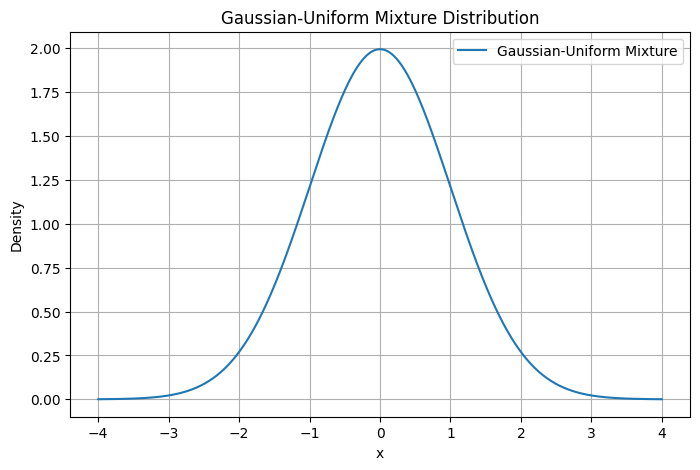

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_uniform_mixture(x, mu=0, sigma=1, a=-1, b=1, alpha=0.7):
    """
    Creates a Gaussian-uniform mixture distribution.
    
    Parameters:
        x: array of points to evaluate the mixture.
        mu: mean of the Gaussian distribution.
        sigma: standard deviation of the Gaussian distribution.
        a: lower bound of the uniform distribution.
        b: upper bound of the uniform distribution.
        alpha: weight of the Gaussian distribution (0 to 1).
               The weight of the uniform distribution is (1 - alpha).
    
    Returns:
        Mixture distribution evaluated at x.
    """
    # Gaussian PDF
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    
    # Uniform PDF
    uniform = np.zeros_like(x)
    uniform[(x >= a) & (x <= b)] = 1 / (b - a)
    
    # Weighted Mixture
    mixture = alpha * gaussian + (1 - alpha) * uniform
    return gaussian

# Define parameters
x = np.linspace(-4, 4, 1000)
mu = 0
sigma = 1
a = -1
b = 1
alpha = 0.7  # Adjust this for more Gaussian or uniform weight

# Create mixture distribution
mixture = gaussian_uniform_mixture(x, mu=mu, sigma=sigma, a=a, b=b, alpha=alpha)
mixture= mixture*5
# Plot the distribution
plt.figure(figsize=(8, 5))
plt.plot(x, mixture, label='Gaussian-Uniform Mixture')
plt.title('Gaussian-Uniform Mixture Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

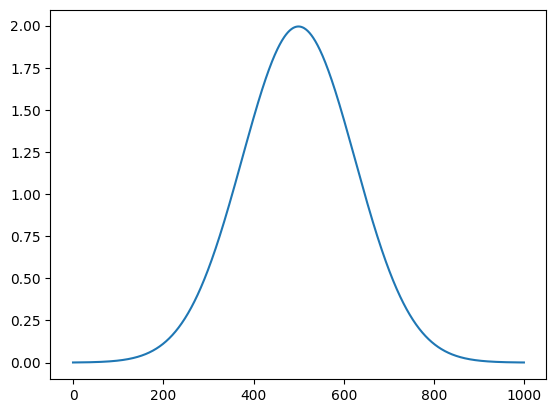

In [ ]:
plt.plot(mixture)

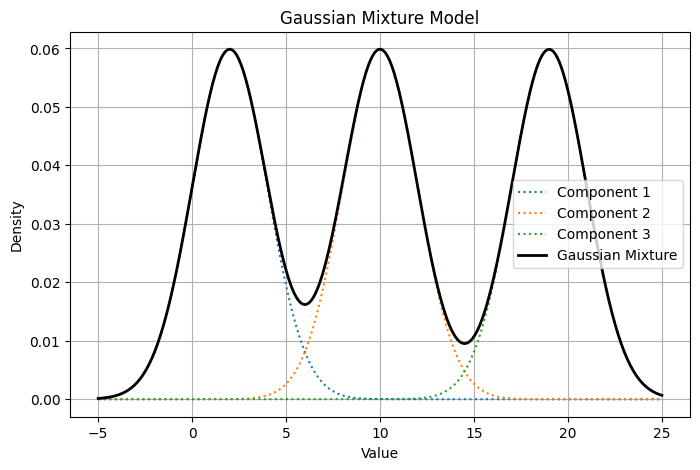

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    """Compute the Gaussian distribution."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gaussian_mixture(x, params):
    """
    Compute a Gaussian mixture model.
    
    params: list of tuples (weight, mean, std_dev)
    """
    mixture = np.zeros_like(x)
    for weight, mu, sigma in params:
        mixture += weight * gaussian(x, mu, sigma)
    return mixture

# Define x range
x = np.linspace(-5, 25, 1000)

# Define Gaussian mixture parameters: (weight, mean, std_dev)
params = [
    (0.3, 2, 2),
    (0.3, 10, 2),
    (0.3, 19, 2),
]

# Compute individual components and the mixture
components = [weight * gaussian(x, mu, sigma) for weight, mu, sigma in params]
mixture = sum(components)

# Plot the components and the mixture
plt.figure(figsize=(8, 5))
for i, component in enumerate(components):
    plt.plot(x, component, linestyle='dotted', label=f'Component {i+1}')
plt.plot(x, mixture, label='Gaussian Mixture', color='black', linewidth=2)
plt.title('Gaussian Mixture Model')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


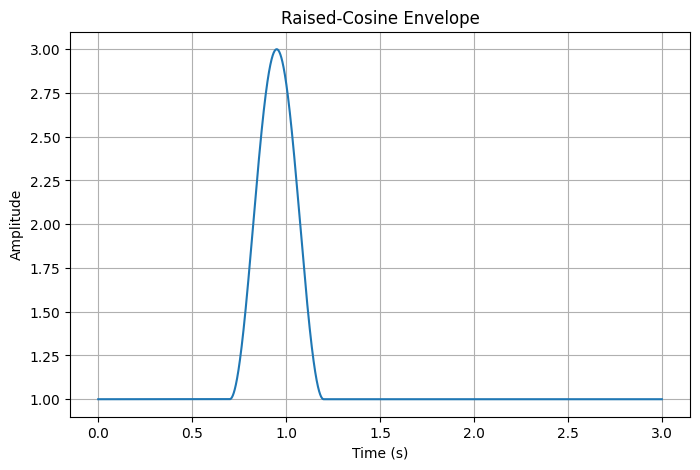

In [25]:

total_dur = 3  # Total duration of the sound
sample_rate = 44100  # Samples per second
event_start = 0.7  # Start time of the event   
event_dur = 0.5  # Duration of the event
intensity =3
t = np.linspace(0, total_dur, int(total_dur * sample_rate))
envelope = np.ones_like(t)  # Default envelope is all 1s (no modulation)

# Compute the raised-cosine window
event_end = event_start + event_dur
mask = (t >= event_start) & (t <= event_end)
t_event = t[mask]
envelope[mask] = 0.5 * (1 - np.cos(2 * np.pi * (t_event - event_start) / event_dur)) * (intensity - 1) + 1

# Plot the envelope
plt.figure(figsize=(8, 5))
plt.plot(t, envelope)
plt.title('Raised-Cosine Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()


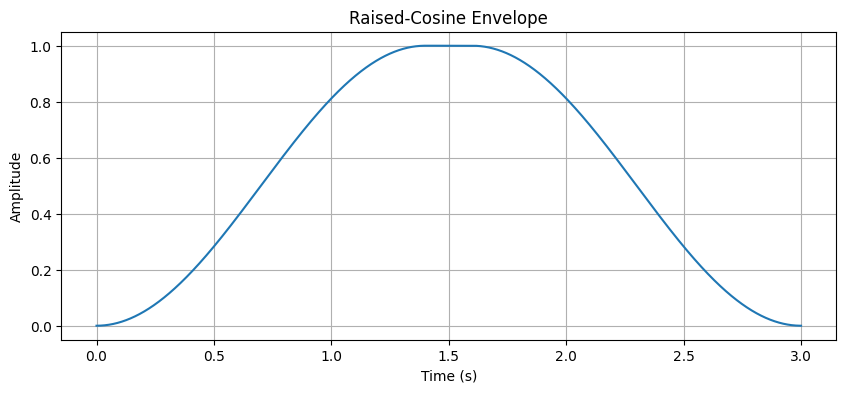

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def raised_cosine_envelope(total_dur, rise_dur, peak_dur, fall_dur, sample_rate):
    """
    Generate a raised-cosine envelope in the time domain.
    :param total_dur: Total duration of the envelope (seconds).
    :param rise_dur: Duration of the rising phase (seconds).
    :param peak_dur: Duration of the flat peak (seconds).
    :param fall_dur: Duration of the falling phase (seconds).
    :param sample_rate: Sampling rate (Hz).
    :return: Raised-cosine envelope as a numpy array.
    """
    assert total_dur == rise_dur + peak_dur + fall_dur, "Total duration must equal rise + peak + fall."

    # Time vector
    t = np.linspace(0, total_dur, int(total_dur * sample_rate), endpoint=False)
    envelope = np.zeros_like(t)

    # Rising phase
    rise_end_idx = int(rise_dur * sample_rate)
    rise_t = np.linspace(0, np.pi, rise_end_idx)
    envelope[:rise_end_idx] = 0.5 * (1 - np.cos(rise_t))  # Raised cosine from 0 to 1

    # Peak phase
    peak_start_idx = rise_end_idx
    peak_end_idx = peak_start_idx + int(peak_dur * sample_rate)
    envelope[peak_start_idx:peak_end_idx] = 1  # Flat peak

    # Falling phase
    fall_start_idx = peak_end_idx
    fall_end_idx = fall_start_idx + int(fall_dur * sample_rate)
    fall_t = np.linspace(0, np.pi, fall_end_idx - fall_start_idx)
    envelope[fall_start_idx:fall_end_idx] = 0.5 * (1 + np.cos(fall_t))  # Raised cosine from 1 to 0

    return envelope

# Example parameters
sample_rate = 44100  # Hz
total_dur = 3.0      # seconds
peak_dur = 0.2       # seconds
rise_dur = (total_dur-peak_dur)/2      # seconds

fall_dur = rise_dur       # seconds

# Generate envelope
envelope = raised_cosine_envelope(total_dur, rise_dur, peak_dur, fall_dur, sample_rate)

# Plot envelope
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, total_dur, len(envelope)), envelope)
plt.title("Raised-Cosine Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


22050 22050 35280 35280


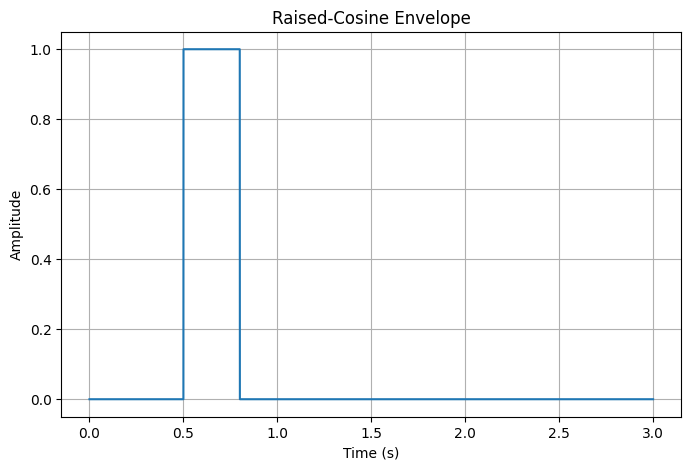

In [102]:
def raised_cosine_envelope(t_start,rise_dur,peak_dur,t_total,sample_rate=44100):
    """
    Generate a raised-cosine envelope in the time domain.
    :param t_start: Start time of the event (seconds).
    :param rise_dur: Duration of the rising phase (seconds).
    :param peak_dur: Duration of the event peak (seconds).
    :param t_total: Total duration of the total envelope (seconds).
    :param sample_rate: Sampling rate (Hz).
    :return: Raised-cosine envelope as a numpy array.
    """
    def time_to_samples(t, sample_rate=44100):
        return int(t * sample_rate)

    total_samples = np.linspace(0, t_total, int(t_total * sample_rate)) # time in terms of samples

    event_dur=2*rise_dur+peak_dur
    t_start=time_to_samples(t_start)
    rise_dur=time_to_samples(rise_dur)
    event_dur=time_to_samples(event_dur)
    peak_dur=time_to_samples(peak_dur)

    t_rise=(t_start+rise_dur)
    t_fall=(t_rise+peak_dur)
    t_end=(t_fall+rise_dur)
    
    print(t_start,t_rise,t_fall,t_end)

    envelope = np.zeros_like(total_samples)
    
    for t in range(len(envelope)):
        if t>t_start and t<=t_rise:
            envelope[t]=0.5*(1-np.cos((np.pi)*((t-t_start)/(t_rise-t_start))))
            #envelope[t]=np.sin((np.pi/2)*((t-t_start)/(t_rise-t_start)))**2
        elif t>t_rise and t<=t_fall:
            envelope[t]=1
        elif t>t_fall and t<=t_end:
            envelope[t] = 0.5*(1+np.cos((np.pi)*((t-t_fall)/(t_rise-t_start))))
    return envelope

total_dur = 3  # Total duration of the sound
sample_rate = 44100  # Samples per second
event_start = 0.5  # Start time of the event
rise_dur = 0.00  # Duration of the rising phase
peak_dur = 0.3  # Duration of the peak
intensity = 3  # Intensity of the envelope

# Generate the time vector
t = np.linspace(0, total_dur, int(total_dur * sample_rate)) # time in terms of samples
envelope = raised_cosine_envelope(event_start,rise_dur,peak_dur,total_dur,sample_rate)

# Plot the envelope
plt.figure(figsize=(8, 5))
plt.plot(t, envelope)
plt.title('Raised-Cosine Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

        